<a href="https://colab.research.google.com/github/zzhining/stock_market_analysis/blob/main/3%EC%A3%BC%EC%B0%A8/ETF%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[자산배분 투자자는 왜 소화가 잘될까요? [초심시리즈.E02편]](https://youtu.be/CP7BuvbnKIY?si=1EZOCs5O57_wro8G)

# 환경셋팅

In [ ]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,760 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
# Matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# pykrx - etf 불러오기

- [kosef200](https://finance.naver.com/item/main.naver?code=069660)

In [ ]:
import yfinance as yf

# 종목코드 102110
ticker = '102110.KS' #TIGER 200  #"069660"#KOSEF200
start_date = '2023-01-01'
end_date = today = datetime.today().strftime('%Y-%m-%d')

# 야후 파이낸스에서 데이터 다운로드
etf = yf.Ticker(ticker)
df = etf.history(start = start_date, end= end_date)

<Axes: xlabel='Date'>

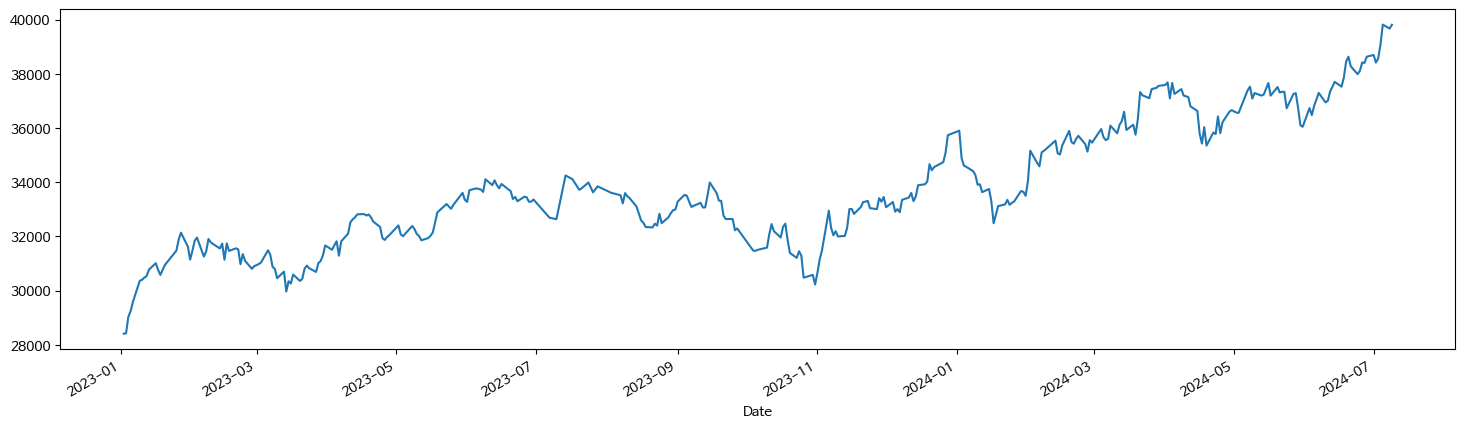

In [ ]:
df['Close'].plot(figsize=(18, 5))

## 포트폴리오 셋팅하기


----
### [영구 포트폴리오](https://www.investopedia.com/terms/p/permanent-portfolio.asp)

- 1980년 해리 브라운(Harry Browne)이 고안한 전략
- 자산을 주식, 금, 채권, 현금으로 4등분하여 보유

In [ ]:
import plotly.express as px

df = pd.DataFrame({'자산군':['주식', '채권', '현금', '금'],
                  '비율':[25, 25, 25, 25]})
fig = px.pie(df, values = '비율', names='자산군',
             title='영구 포트폴리오', template="plotly_white")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

----
### 올시즌(올웨더) 포트폴리오
 - [레이달리오](https://namu.wiki/w/%EB%A0%88%EC%9D%B4%20%EB%8B%AC%EB%A6%AC%EC%98%A4)


```
미국의 투자가이자 헤지펀드 매니저. 브리지워터 어소시에이츠 설립자이자 전 CEO.

20세기에는 워렌 버핏이라면 21세기에는 레이 달리오라 해도 과언이 아닐 정도로 금융계를 선도하는 인물로 금융계의 스티브 잡스라는 별명이 있다.

2008년 세계 금융 위기 이전에 위기가 올 시기를 1~2개월 오차로 예측해낸 것으로 유명하다.

2000년 닷컴버블, 2008년 미국발 세계금융위기 에서 성공적으로 포트폴리오를 꾸려
현재까지 전 세계 자산 1위(미화 약 15.6억 달러/ 한화 약 18조 원)의 헤지펀드 매니저로서의 명성을 갖고 있다.

레이 달리오가 만든 올웨더 포트폴리오 전략은 금융계와 개인 투자자들 사이에서 정석으로 꼽힐 정도로 선풍적인 대세 전략으로 꼽히고 있다.
```




 - [레이달리오처럼 투자하기, ETF로 하는법](https://blog.toss.im/article/asset-allocation-etf)

In [ ]:
import plotly.express as px

df = pd.DataFrame({'자산군':['주식', '장기채권', '중기채권', '원자재', '금'],
                  '비율':[30, 40, 15, 7.5, 7.5]})
fig = px.pie(df, values = '비율', names='자산군',
             title='올시즌 포트폴리오', template="plotly_white")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

----
### 맞춤형 포트폴리오
 - 국내/해외 주식을 구분하고, 배당자산을 별도로 설정
 - 안전자산(60)
    - 채권(30), 금(20), 달러(10)
 - 투자자산(20)
    - 국내주식(10), 해외주식(10)
 - 배당자산(15)
 - 현금자산(5)

In [ ]:
import plotly.express as px

df = pd.DataFrame({'자산군':['안전자산', '배당자산', '투자자산', '현금자산'],
                  '비율':[60, 15, 20, 5]})
fig = px.pie(df, values = '비율', names='자산군',
             title='맞춤형 포트폴리오', template="plotly_white")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

---
# 실습

### 예상투자금 설정
월 100만원을 투자한다고 가정하고,세팅 비중에 따라 자산별 투자금액을 설정합니다.

## 현재 금액 읽어오기

항목별 현재  가격을 읽어옵니다.

### 종목명 업데이트
티커는 인지하기 어떤 종목인지 인지하기 어려우므로, 종목명을 읽어옵니다.

## 보유 수량 설정

`예상투자금`으로 각 종목을 얼마나 구매 가능한 지 보유수량을 결정합니다.
`수량`은 `예상투자금`을 `현재가`로 나누어 반올림하여 정하였습니다.
따라서 실제 투자금은 `예상투자금`보다 클 수 있습니다.

## 실투자금 업데이트

 위에서 계산한 종목별 `수량`에 따라 `현재가`로 구매했을 시, 실제 발생한 투자금을 업데이트 합니다. 실제 투자금은 수수료가 추가로 부가되지만, 수수료에 대한 부분은 고려하지 않았습니다.

# 일자별 투자 리포트 생성하기
위에서 설정한 로직을 수행하는 함수를 생성합니다.

## 기간별 수익률 계산
- 2024년 1월 1일부터 2024년 7월 10일까지 매달 초에 한 번씩 투자를 진행했을 경우 수익률을 계산합니다.

## 날짜별 각 종목 투자 현황

## 종목별 가격 시각화
